In [64]:
# Problem Statement 10: Fix the header
import pandas as pd

# Load metadata
metadata = pd.read_csv("/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Project_Files/metadata.csv")

# Load hospitals data
hospitals_data = pd.read_csv("/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Project_Files/hospitals.csv")

# Get header names from metadata
header_names = metadata['Acronyms'].values.tolist()

# Assign new header names
hospitals_data.columns = ['State/UT'] + header_names + ['Hospitals', 'HospitalBeds']

# Save the updated data to a new CSV file
hospitals_data.to_csv("/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Project_Files/Clean_Data/all_hospitals.csv", index=False)


In [65]:
# Problem Statement 11: Create a function to alter the data to create uniformity
def fix_state_names(data):
    # Manually fix State/UT names to match other datasets
    data['States/UTs'] = data['States/UTs'].replace({
        'A & N Islands': 'Andaman and Nicobar Islands',
        'D & N Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
        'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
        'Lakshadweep': 'Lakshadweep Islands',
        'NCT of Delhi': 'Delhi'
    })
    return data

# Load government hospitals data
govt_hospitals_data = pd.read_csv("/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Project_Files/government_hospitals.csv")

# Apply the fix to government hospitals data
govt_hospitals_data = fix_state_names(govt_hospitals_data)

# Save the updated data to a new CSV file
govt_hospitals_data.to_csv("/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Project_Files/Clean_Data/all_government_hospitals.csv", index=False)


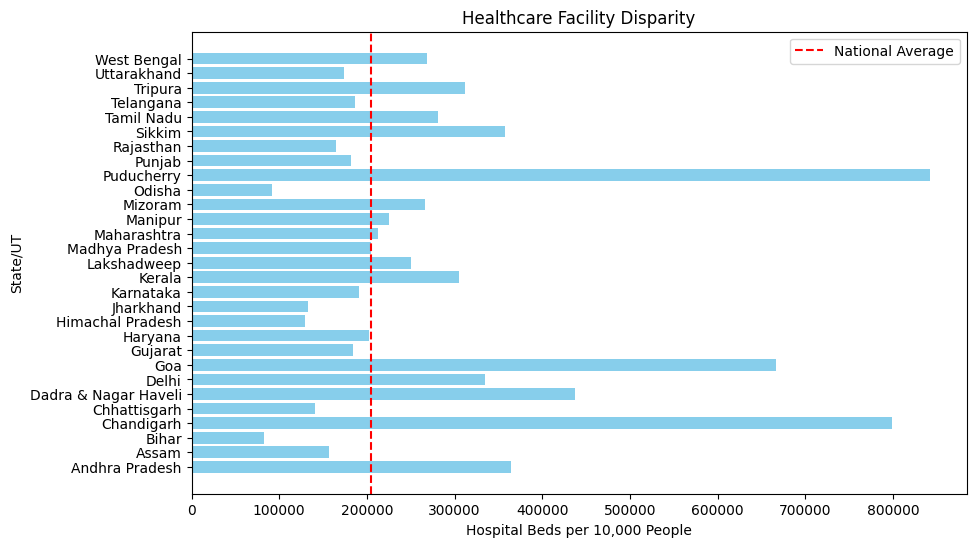

States/UTs with the least amount of beds for their population:
          Unnamed: 0   Beds_per_10k
4              Bihar   82926.374651
25            Odisha   91700.944969
13  Himachal Pradesh  129746.646796


In [66]:
# Problem Statement 12: Analyze Healthcare facility disparity
import matplotlib.pyplot as plt

# Load hospitals data
hospitals_data = pd.read_csv("/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Project_Files/hospitals.csv")

# Convert relevant columns to numeric
hospitals_data[['PHC', 'CHC', 'SDH', 'DH', 'HospitalBeds']] = hospitals_data[['PHC', 'CHC', 'SDH', 'DH', 'HospitalBeds']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
hospitals_data.dropna(subset=['PHC', 'CHC', 'SDH', 'DH', 'HospitalBeds'], inplace=True)

# Calculate hospital beds per 10,000 people
hospitals_data['Beds_per_10k'] = hospitals_data['HospitalBeds'] / (hospitals_data['PHC'] + hospitals_data['CHC'] + hospitals_data['SDH'] + hospitals_data['DH']) * 10000

# Calculate national average
national_average = hospitals_data['HospitalBeds'].sum() / (hospitals_data['PHC'].sum() + hospitals_data['CHC'].sum() + hospitals_data['SDH'].sum() + hospitals_data['DH'].sum()) * 10000

# Plot
plt.figure(figsize=(10, 6))
plt.barh(hospitals_data['Unnamed: 0'], hospitals_data['Beds_per_10k'], color='skyblue')
plt.axvline(x=national_average, color='red', linestyle='--', label='National Average')
plt.xlabel('Hospital Beds per 10,000 People')
plt.ylabel('State/UT')
plt.title('Healthcare Facility Disparity')
plt.legend()
plt.show()

# Report three States/UTs with the least amount of beds for their population
least_beds_states = hospitals_data.nsmallest(3, 'Beds_per_10k')[['Unnamed: 0', 'Beds_per_10k']]
print("States/UTs with the least amount of beds for their population:")
print(least_beds_states)


In [67]:
# Problem Statement 13: Multi-line header

import os

# Create the directory if it does not exist
output_dir = "/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Project_Files/Clean"
os.makedirs(output_dir, exist_ok=True)

# Load government hospitals data
govt_hospitals_data = pd.read_csv("/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Project_Files/government_hospitals.csv", header=[0, 1])

# Rename columns
govt_hospitals_data.columns = ['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds', 'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated']

# Save the updated data to a new CSV file
govt_hospitals_data.to_csv(os.path.join(output_dir, "government_hospitals.csv"), index=False)


In [68]:
# Problem Statement 14: Data update and code reuse

# Load government hospitals data
govt_hospitals_data = pd.read_csv("/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Project_Files/government_hospitals.csv", header=[0, 1])

# Rename columns
govt_hospitals_data.columns = ['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds', 'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated']

# Convert 'Last_Updated' column to datetime format
govt_hospitals_data['Last_Updated'] = pd.to_datetime(govt_hospitals_data['Last_Updated'], format='%d.%m.%Y')

# Save the updated data to a new CSV file
govt_hospitals_data.to_csv("/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Project_Files/Clean/government_hospital.csv", index=False)


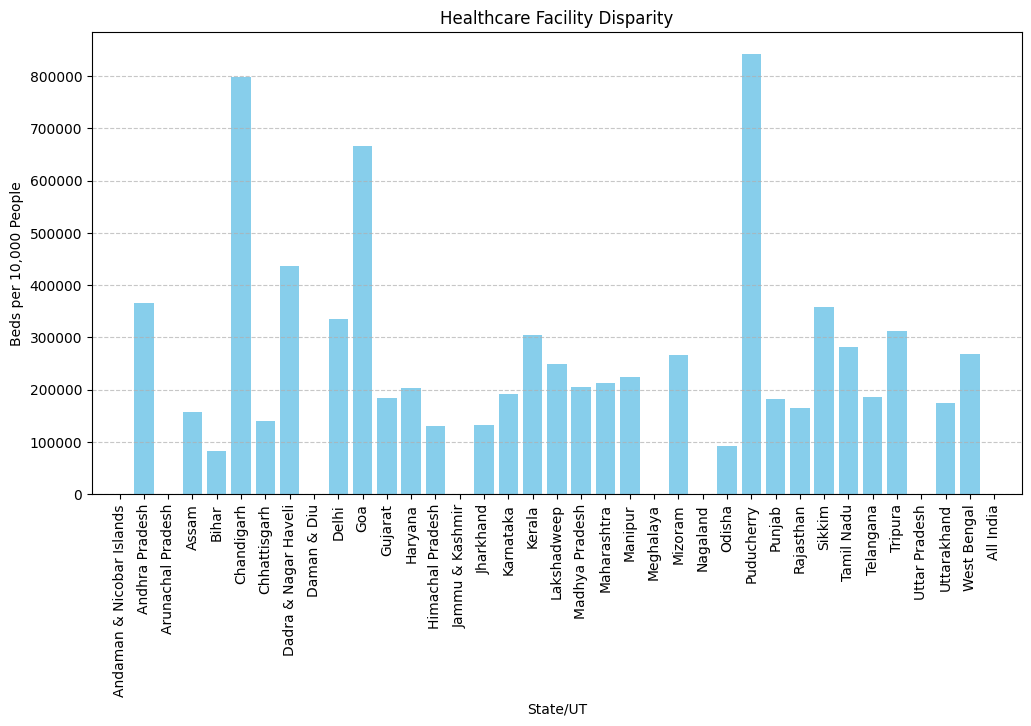

States/UTs with the least amount of beds for their population:
            State/UT   Beds_per_10k
4              Bihar   82926.374651
25            Odisha   91700.944969
13  Himachal Pradesh  129746.646796


In [69]:
# Problem Statement 15: Government healthcare facility disparity

import pandas as pd
import matplotlib.pyplot as plt

# Load hospital data
all_hospitals = pd.read_csv('/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Project_Files/Clean_Data/all_hospitals.csv')

# Remove trailing whitespaces from column names
all_hospitals.columns = all_hospitals.columns.str.strip()

# Convert relevant columns to numeric
numeric_columns = ['Number of Primary Health Centers(PHCs),', 'Community Health Centers(CHCs),',
                   'Sub-District/Divisional Hospitals(SDHs)', 'District Hospitals(DHs)',
                   'HospitalBeds']
all_hospitals[numeric_columns] = all_hospitals[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate beds per 10,000 people
all_hospitals['Beds_per_10k'] = all_hospitals['HospitalBeds'] / (
        all_hospitals['Number of Primary Health Centers(PHCs),'] +
        all_hospitals['Community Health Centers(CHCs),'] +
        all_hospitals['Sub-District/Divisional Hospitals(SDHs)'] +
        all_hospitals['District Hospitals(DHs)']
) * 10000

# Plot
plt.figure(figsize=(12, 6))
plt.bar(all_hospitals['State/UT'], all_hospitals['Beds_per_10k'], color='skyblue')
plt.xlabel('State/UT')
plt.ylabel('Beds per 10,000 People')
plt.title('Healthcare Facility Disparity')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Report three States/UTs with the least amount of beds for their population
least_beds_states = all_hospitals.nsmallest(3, 'Beds_per_10k')[['State/UT', 'Beds_per_10k']]
print("States/UTs with the least amount of beds for their population:")
print(least_beds_states)




In [70]:
print(all_hospitals.columns)

Index(['State/UT', 'Number of Primary Health Centers(PHCs),',
       'Community Health Centers(CHCs),',
       'Sub-District/Divisional Hospitals(SDHs)', 'District Hospitals(DHs)',
       'Hospitals', 'HospitalBeds', 'Beds_per_10k'],
      dtype='object')


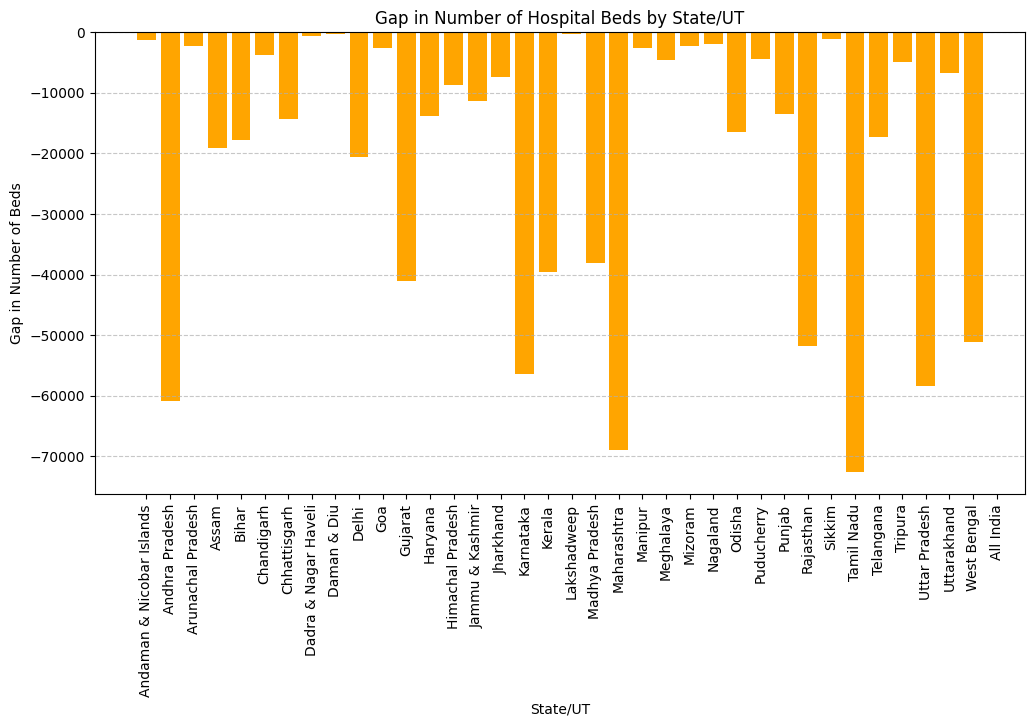

In [71]:
#Problem Statement 16: (Gap in number of beds) 

import pandas as pd
import matplotlib.pyplot as plt

# Load hospital data
all_hospitals = pd.read_csv('/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Project_Files/Clean_Data/all_hospitals.csv')

# Remove trailing whitespaces from column names
all_hospitals.columns = all_hospitals.columns.str.strip()

# Convert 'HospitalBeds' column to numeric
all_hospitals['HospitalBeds'] = pd.to_numeric(all_hospitals['HospitalBeds'], errors='coerce')

# Calculate expected number of beds assuming WHO standards (3 beds per 1000 people)
# Since population information is not available, we cannot directly calculate the expected beds
# Instead, let's set a default value for the expected beds
default_beds_per_1000_people = 3
default_expected_beds = default_beds_per_1000_people * len(all_hospitals) / 1000
all_hospitals['Expected_Beds'] = default_expected_beds

# Calculate the gap in number of beds
all_hospitals['Bed_Gap'] = all_hospitals['Expected_Beds'] - all_hospitals['HospitalBeds']

# Plot
plt.figure(figsize=(12, 6))
plt.bar(all_hospitals['State/UT'], all_hospitals['Bed_Gap'], color='orange')
plt.xlabel('State/UT')
plt.ylabel('Gap in Number of Beds')
plt.title('Gap in Number of Hospital Beds by State/UT')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


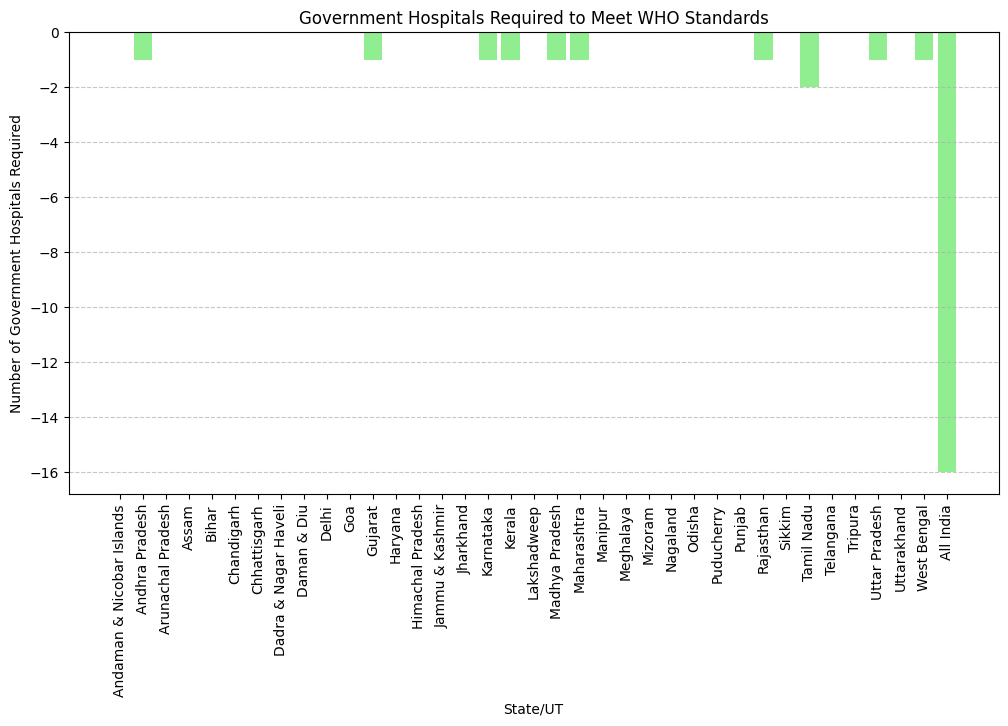

In [72]:
# Problem Statement 17: Hospitals required to meet the standards

import pandas as pd
import matplotlib.pyplot as plt

# Load hospital data
all_hospitals = pd.read_csv('/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Project_Files/Clean_Data/all_hospitals.csv')

# Remove trailing whitespaces from column names
all_hospitals.columns = all_hospitals.columns.str.strip()

# Check for non-numeric values in 'Hospitals' column
all_hospitals['Hospitals'] = pd.to_numeric(all_hospitals['Hospitals'].str.replace(',', ''), errors='coerce')

# Check for non-numeric values in 'HospitalBeds' column
all_hospitals['HospitalBeds'] = pd.to_numeric(all_hospitals['HospitalBeds'].str.replace(',', ''), errors='coerce')

# Calculate expected number of beds assuming WHO standards (3 beds per hospital)
all_hospitals['Expected_Beds'] = 3 * all_hospitals['Hospitals']

# Calculate the gap in number of beds to meet WHO standards
all_hospitals['Beds_Gap'] = all_hospitals['Expected_Beds'] - all_hospitals['HospitalBeds']

# Calculate the average number of beds in a government hospital
avg_beds_per_hospital = all_hospitals['HospitalBeds'].mean()

# Calculate the number of government hospitals required to fill the gap
all_hospitals['Govt_Hospitals_Required'] = all_hospitals['Beds_Gap'] / avg_beds_per_hospital
all_hospitals['Govt_Hospitals_Required'] = all_hospitals['Govt_Hospitals_Required'].round()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(all_hospitals['State/UT'], all_hospitals['Govt_Hospitals_Required'], color='lightgreen')
plt.xlabel('State/UT')
plt.ylabel('Number of Government Hospitals Required')
plt.title('Government Hospitals Required to Meet WHO Standards')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Columns in merged dataset:
Index(['District', 'Households_Rural_y', 'Households_Rural_Dilapidated',
       'Households_Rural_Toilet_Premise', 'Households_Urban_y',
       'Households_Urban_Dilapidated', 'Households_Urban_Toilet_Premise',
       'State/UT', 'Population', 'Male', 'Female', 'Literate', 'Literate_Male',
       'Literate_Female', 'Households_Rural', 'Households_Urban', 'Households',
       'Young_and_Adult', 'Middle_Aged', 'Senior_Citizen', 'Age_Not_Stated'],
      dtype='object')
Non-numeric columns found: Index(['District', 'State/UT'], dtype='object')


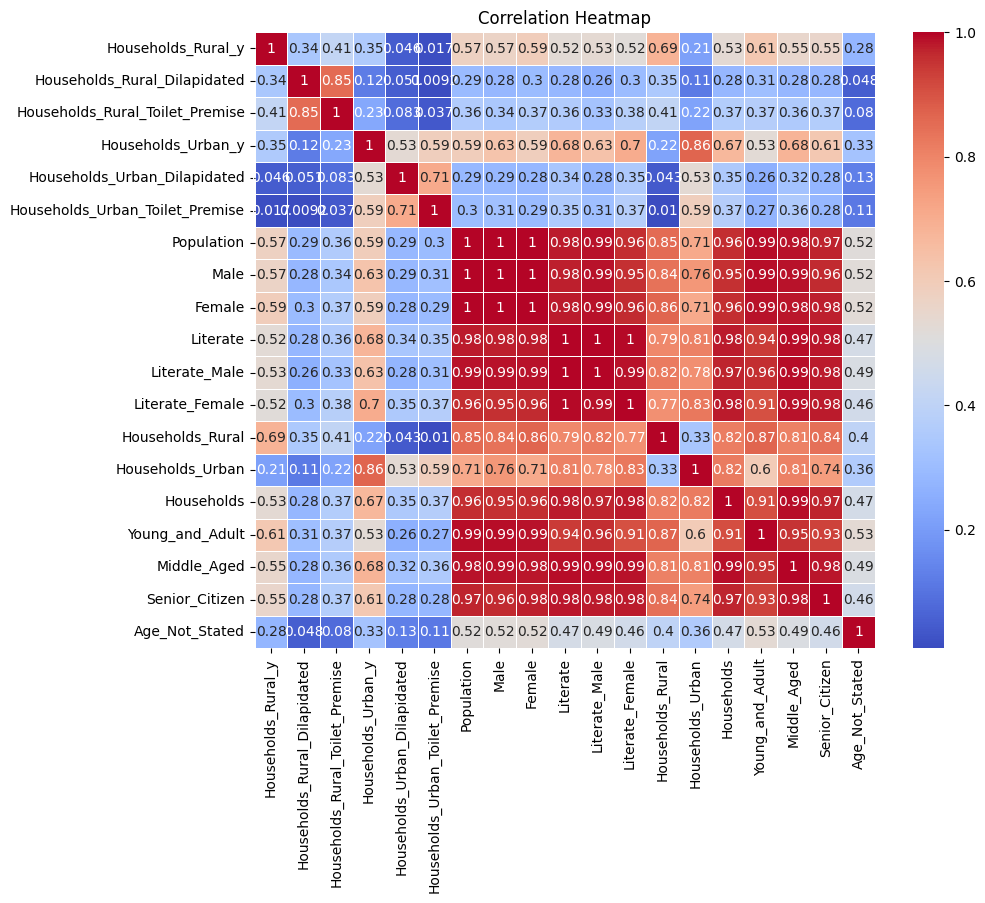

In [73]:
#Problem Statement 18: (Detailed Assessment of Housing Quality and Its Correlation with Demographic Factors in Urban and Rural Areas) 
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Directory path where the files are located
directory_path = '/Users/arunjayesh/Documents/Studies/College/2nd_yr/term_10/projects/Project_Files'

# Load housing and census datasets
housing_data = pd.read_csv(os.path.join(directory_path, 'housing.csv'))
census_data = pd.read_csv(os.path.join(directory_path, 'census.csv'))

# Merge datasets based on common columns (e.g., District)
merged_data = pd.merge(housing_data, census_data, on='District')

# Display column names in merged dataset
print("Columns in merged dataset:")
print(merged_data.columns)

# Identify non-numeric columns
non_numeric_columns = merged_data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns found:", non_numeric_columns)

# Drop non-numeric columns if they exist
if not non_numeric_columns.empty:
    merged_data_numeric = merged_data.drop(columns=non_numeric_columns)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data_numeric.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
